In [4]:
import pandas as pd

df = pd.read_excel('data-leh.xlsx')

In [5]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


Задание №1

In [7]:
vk = df['ad_channel'].str.count('VK').sum()

yandex = df['ad_channel'].str.count('Yandex').sum()

tg = df['ad_channel'].str.count('Telegram').sum()

In [8]:
cnt = max(vk, yandex, tg)
if vk == cnt:
    print(f'Наибольший профит от VK, {cnt} покупателей!')
elif yandex == cnt:
    print(f'Наибольший профит от Yandex, {cnt} покупателей!')
else:
    print(f'Наибольший профит от Telegram, {cnt} покупателей!')

Наибольший профит от Yandex, 3183 покупателей!


Ответ: Яндекс

Задание №2

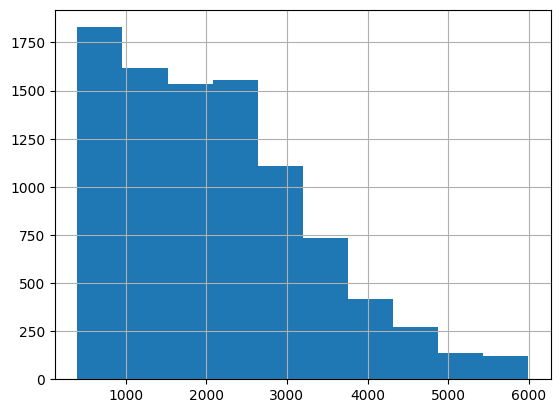

In [9]:
amount = df['amount'].hist()

<Axes: >

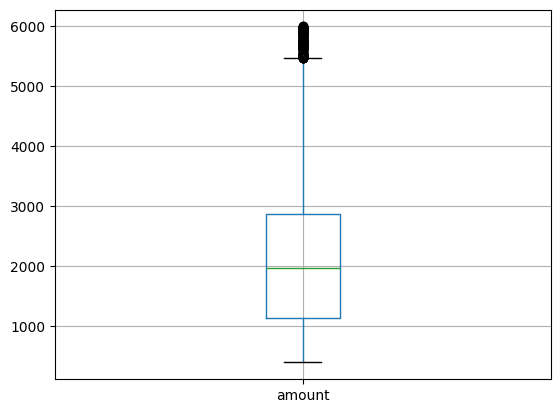

In [10]:
df.boxplot(column=['amount'])

Вывод: Медиана покупок находится ~2000, а средняя стоймость покупки находится в диапазоне от 1100 до 2900

Либо второй вариант

In [11]:
mean_stoimost = df['amount'].mean()
print(mean_stoimost)

2114.6379716981132


Что также подтверждает предыдушие данные

Задание 3

In [12]:
unique_region = df['region'].unique()
print(unique_region)

df.head()

['Moscow' 'Novosibirsk' 'Saint Petersburg' 'Yekaterinburg' 'Chelyabinsk'
 'Kazan']


,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


In [13]:
Moscow_sells = df[df['region'] == 'Moscow']['amount'].sum()
Novosibirsk_sells = df[df['region'] == 'Novosibirsk']['amount'].sum()
SPB_sells = df[df['region'] == 'Saint Petersburg']['amount'].sum()
Yekaterinburg_sells = df[df['region'] == 'Yekaterinburg']['amount'].sum()
Chelyabinsk_sells = df[df['region'] == 'Chelyabinsk']['amount'].sum()
Kazan_sells = df[df['region'] == 'Kazan']['amount'].sum()

max_sells_region = max(Moscow_sells, Novosibirsk_sells, \
                       SPB_sells, Yekaterinburg_sells, \
                       Chelyabinsk_sells, Kazan_sells)

print(f'общая выручка с Москвы: {Moscow_sells} \n' \
      f'общая выручка с Новосиба: {Novosibirsk_sells} \n' \
      f'общая выручка с СПб: {SPB_sells} \n' \
      f'общая выручка с Екб {Yekaterinburg_sells} \n' \
      f'общая выручка с Челябинска: {Chelyabinsk_sells} \n' \
      f'общая выручка с Казани: {Kazan_sells} \n' \
      f'Наибольшая прибыль: {max_sells_region} - Москва')

общая выручка с Москвы: 6688894 
общая выручка с Новосиба: 1342022 
общая выручка с СПб: 5907371 
общая выручка с Екб 1528163 
общая выручка с Челябинска: 2792298 
общая выручка с Казани: 1466595 
Наибольшая прибыль: 6688894 - Москва


<BarContainer object of 6 artists>

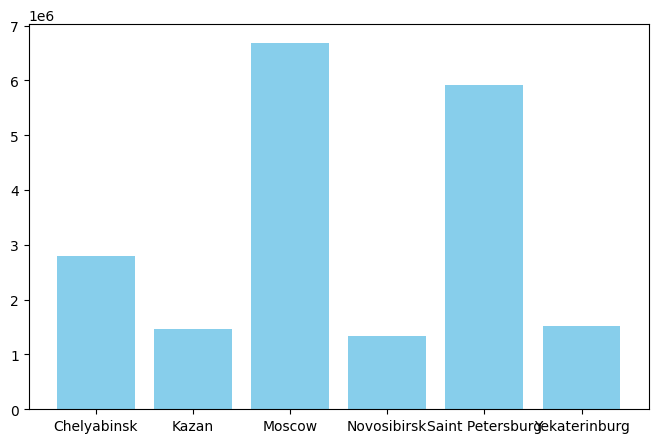

In [14]:
import matplotlib.pyplot as plt

sales_by_region = df.groupby('region')['amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(sales_by_region['region'], sales_by_region['amount'], color='skyblue')

In [15]:
print(unique_region)

['Moscow' 'Novosibirsk' 'Saint Petersburg' 'Yekaterinburg' 'Chelyabinsk'
 'Kazan']


In [16]:
mean_chek_msk = df[df['region'] == 'Moscow']['amount'].mean()
mean_chek_novosib = df[df['region'] == 'Novosibirsk']['amount'].mean()
mean_chek_spb = df[df['region'] == 'Saint Petersburg']['amount'].mean()
mean_chek_ekb = df[df['region'] == 'Yekaterinburg']['amount'].mean()
mean_chek_clb = df[df['region'] == 'Chelyabinsk']['amount'].mean()
mean_chek_kzn = df[df['region'] == 'Kazan']['amount'].mean()

print(f'Средний чек, в Москве ~ {mean_chek_msk:.1f} \n' \
      f'Средний чек, в Новосибе ~ {mean_chek_novosib:.1f} \n' \
      f'Средний чек, в Спб ~ {mean_chek_spb:.1f} \n' \
      f'Средний чек, в Екб ~ {mean_chek_ekb:.1f} \n' \
      f'Средний чек, в Челябинске ~ {mean_chek_clb:.1f} \n' \
      f'Средний чек, в Казане ~ {mean_chek_kzn:.1f} \n' )

Средний чек, в Москве ~ 1813.2 
Средний чек, в Новосибе ~ 2988.9 
Средний чек, в Спб ~ 1812.1 
Средний чек, в Екб ~ 3020.1 
Средний чек, в Челябинске ~ 3015.4 
Средний чек, в Казане ~ 2945.0 



In [17]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


In [18]:
cnt_date = df[(df['purchase_date'] >= '2024-06-01') & (df['purchase_date'] <= '2024-07-01')]['amount']
print(f'За Июнь суммарная сумма заказов: {len(cnt_date)}')

За Июнь суммарная сумма заказов: 2528


  purchase_date   amount month_str
0       2024-01   291708   2024-01
1       2024-02   798994   2024-02
2       2024-03  1555638   2024-03
3       2024-04  2555290   2024-04
4       2024-05  3652192   2024-05
5       2024-06  5167678   2024-06
6       2024-07  5703843   2024-07


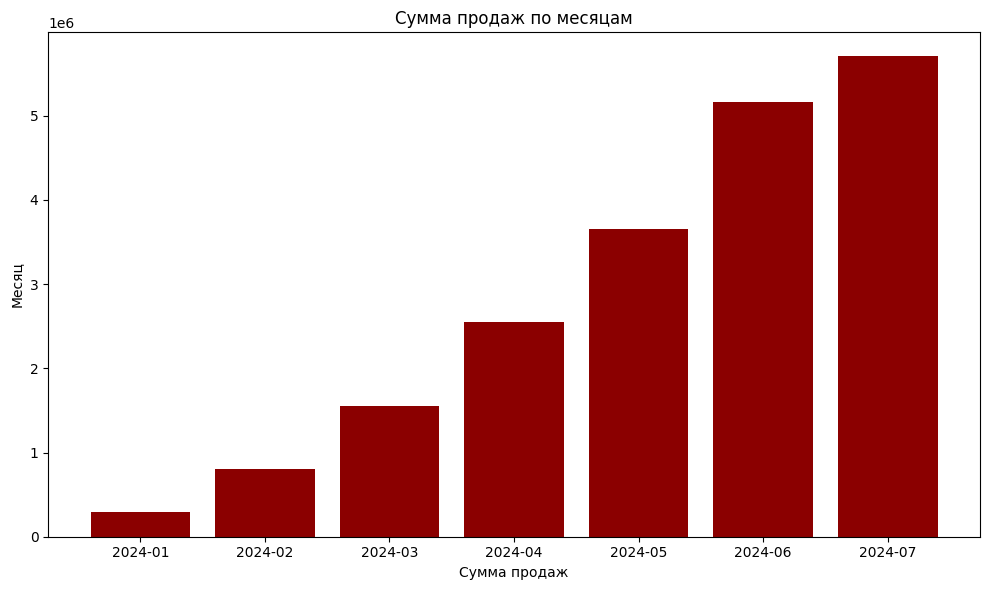

In [19]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
month_amount_sum = df.groupby(df['purchase_date'].dt.to_period('M'))['amount'].sum().reset_index()
month_amount_sum['month_str'] = month_amount_sum['purchase_date'].astype(str)
print(month_amount_sum)
plt.figure(figsize=(10, 6))
plt.bar(month_amount_sum['month_str'], month_amount_sum['amount'], color='darkred')

plt.title('Сумма продаж по месяцам')
plt.xlabel('Сумма продаж')
plt.ylabel('Месяц')
plt.tight_layout()
plt.show()

Вывод: С каждым месяцем количество заказов возрастает, что опрадывается работой привлечения

Задача 4

In [20]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


  purchase_date  item_count month_str
0       2024-01         415   2024-01
1       2024-02        1110   2024-02
2       2024-03        2212   2024-03
3       2024-04        3655   2024-04
4       2024-05        5184   2024-05
5       2024-06        7345   2024-06
6       2024-07        8172   2024-07


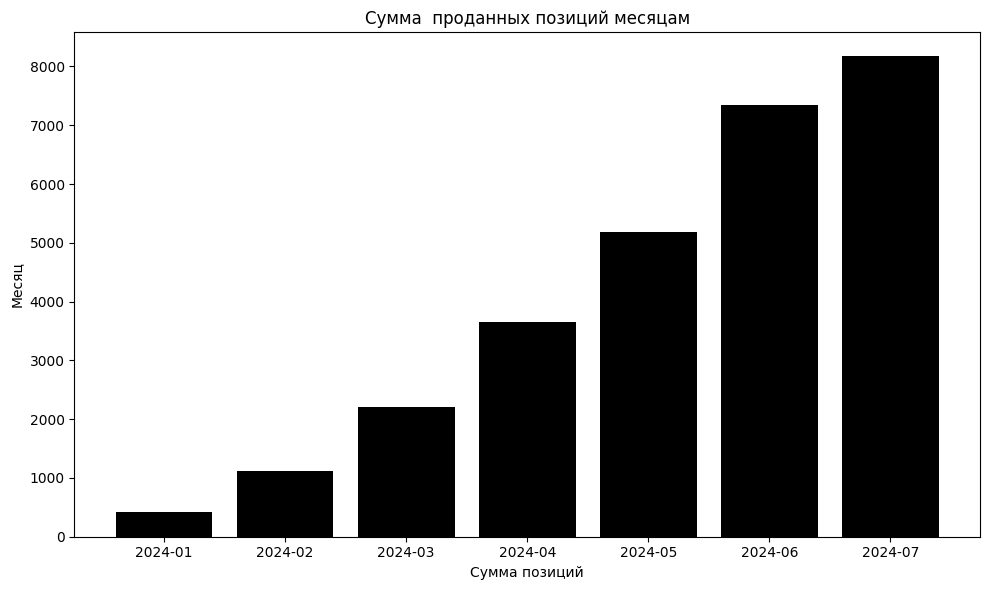

In [21]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
month_item_sum = df.groupby(df['purchase_date'].dt.to_period('M'))['item_count'].sum().reset_index()
month_item_sum['month_str'] = month_item_sum['purchase_date'].astype(str)
print(month_item_sum)
plt.figure(figsize=(10, 6))
plt.bar(month_item_sum['month_str'], month_item_sum['item_count'], color='black')

plt.title('Сумма  проданных позиций месяцам')
plt.xlabel('Сумма позиций')
plt.ylabel('Месяц')
plt.tight_layout()
plt.show()

Вывод: Рассмотрев графики можно выделить постояный тренд с рекламы и других способов продвижения, с примерно одинаковым ростом.

ЗАДАНИЕ №5

In [22]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


In [23]:
unique_delivery_status = df['delivery_status'].unique()
print(unique_delivery_status)

['delivered' 'in transit' 'cancelled']


In [53]:
city_delivery_status = df.groupby('region')['delivery_status'].value_counts()
print(city_delivery_status)

region            delivery_status
Chelyabinsk       delivered           823
                  in transit           77
                  cancelled            26
Kazan             delivered           450
                  in transit           36
                  cancelled            12
Moscow            delivered          3300
                  in transit          282
                  cancelled           107
Novosibirsk       delivered           392
                  in transit           40
                  cancelled            17
Saint Petersburg  delivered          2915
                  in transit          271
                  cancelled            74
Yekaterinburg     delivered           449
                  in transit           46
                  cancelled            11
Name: count, dtype: int64


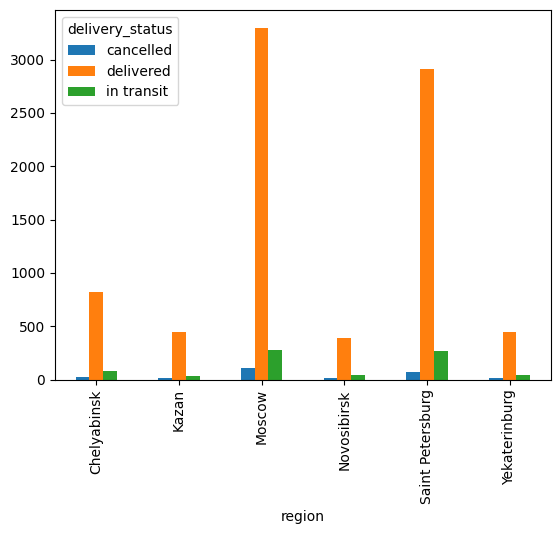

In [24]:
df.groupby(['region', 'delivery_status']).size().unstack().plot(kind='bar')
plt.show()

Вывод: Наибольший процент отмененых заказов в Москве, однако это оправдывыается наибольшим количеством заказов в целом, включаяя доставленные заказы

Задание №6

In [25]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


In [26]:
from collections import Counter
client_data = df.groupby('client_id').agg({
    'amount': 'sum',
    'region': lambda x: Counter(x).most_common(1)[0][0],
    'payment_method': lambda x: Counter(x).most_common(1)[0][0]
}).reset_index()
bins = [0, 5000, 10000, 50000, float('inf')]
labels = ['Малые (<5k)', 'Средние (5-10k)', 'Крупные (10-50k)', 'VIP (>50k)']
client_data['Группа'] = pd.cut(client_data['amount'], bins=bins, labels=labels, right=False)
def analyze_group(df_group, group_name):
    if df_group.empty:
        return None
    return {
        'Группа': group_name,
        'Общая сумма': df_group['amount'].sum(),
        'Средний чек': df_group['amount'].mean(),
        'Популярный город': Counter(df_group['region']).most_common(1)[0][0],
        'Основной способ оплаты': Counter(df_group['payment_method']).most_common(1)[0][0],
        'Кол-во клиентов': len(df_group),
        'Доля от общего': f"{len(df_group)/len(client_data)*100:.1f}%"
    }

results = []
for group in labels:
    group_df = client_data[client_data['Группа'] == group]
    results.append(analyze_group(group_df, group))

report_df = pd.DataFrame([x for x in results if x is not None])
report_df.head()

,Группа,Общая сумма,Средний чек,Популярный город,Основной способ оплаты,Кол-во клиентов,Доля от общего
0,Малые (<5k),914997,2868.329154,Moscow,cash,319,19.1%
1,Средние (5-10k),2782206,7539.853659,Moscow,electronic,369,22.1%
2,Крупные (10-50k),16028140,16388.691207,Moscow,electronic,978,58.7%


Вывод: В среднем половина клиентов делает крупные покупки свыше 10, но меньше 50 тысяч. Преимушественно используется электронный способ оплаты, а Москва наиболле частый город покупки.

Задание №7

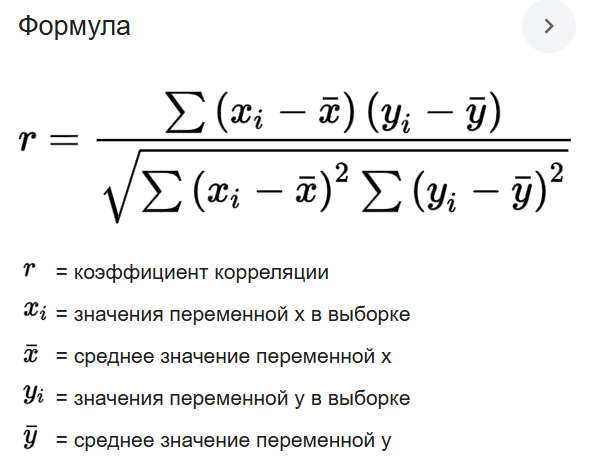
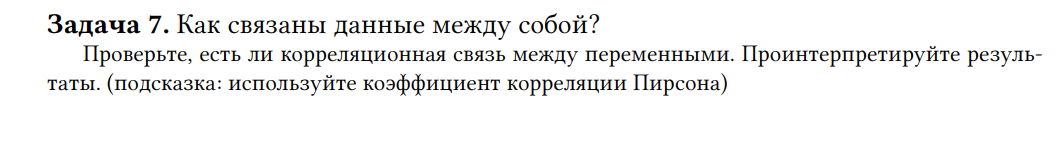

In [27]:
df.head()

,purchase_id,client_id,purchase_date,amount,item_count,region,payment_method,delivery_status,ad_channel
0,VK3430621,1001,2024-06-04,1977,3,Moscow,cash,delivered,VK
1,VK7534866,1001,2024-06-12,2072,2,Novosibirsk,electronic,in transit,VK
2,VK5837223,1001,2024-05-06,1620,3,Saint Petersburg,card,delivered,VK
3,VK6598863,1001,2024-07-16,3864,4,Yekaterinburg,card,delivered,VK
4,VK6113060,1001,2024-07-25,1398,3,Saint Petersburg,card,delivered,VK


In [31]:
df['payment_code'] = df['payment_method'].map({'cash': 1, 'electronic': 2, 'card': 3})
df['region_code'] = df['region'].map({'Moscow': 1, 'Novosibirsk': 2, 'Saint Petersburg': 3, 'Yekaterinburg': 4, 'Chelyabinsk': 5, 'Kazan': 6})
df['delivery_code'] = df['delivery_status'].map({'delivered': 1, 'in transit': 2, 'cancelled': 3})
df['ad_code'] = df['ad_channel'].map({'VK': 1, 'Yandex': 2, 'Telegram': 3})
df[['amount', 'item_count', 'region_code', 'payment_code', 'delivery_code', 'ad_code']].corr().head()

,amount,item_count,region_code,payment_code,delivery_code,ad_code
amount,1.000000,0.816196,0.300176,0.004110,-0.009511,0.000708
item_count,0.816196,1.000000,-0.007600,0.008692,-0.021114,0.000704
region_code,0.300176,-0.007600,1.000000,-0.015208,-0.004912,0.007836
payment_code,0.004110,0.008692,-0.015208,1.000000,0.007100,-0.007659
delivery_code,-0.009511,-0.021114,-0.004912,0.007100,1.000000,-0.002419


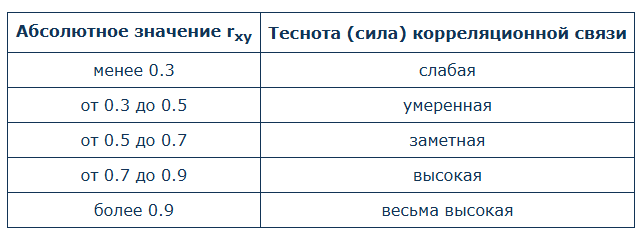

In [34]:
# Припахаем гпт пускай строчит интерпретацию
corr_data = {
    'amount': [1.000000, 0.816196, 0.300176, 0.004110, -0.009511, 0.000708],
    'item_count': [0.816196, 1.000000, -0.007600, 0.008692, -0.021114, 0.000704],
    'region_code': [0.300176, -0.007600, 1.000000, -0.015208, -0.004912, 0.007836],
    'payment_code': [0.004110, 0.008692, -0.015208, 1.000000, 0.007100, -0.007659],
    'delivery_code': [-0.009511, -0.021114, -0.004912, 0.007100, 1.000000, -0.002419],
    'ad_code': [0.000708, 0.000704, 0.007836, -0.007659, -0.002419, 1.000000]
}
corr_df = pd.DataFrame(corr_data,
                      index=['amount', 'item_count', 'region_code',
                             'payment_code', 'delivery_code', 'ad_code'])

def interpret_correlation(r):
    abs_r = abs(r)
    if abs_r < 0.3:
        return 'слабая'
    elif 0.3 <= abs_r < 0.5:
        return 'умеренная'
    elif 0.5 <= abs_r < 0.7:
        return 'заметная'
    elif 0.7 <= abs_r < 0.9:
        return 'высокая'
    else:
        return 'весьма высокая'

print("Интерпретация значимых корреляций:")
print("---------------------------------")

for col1 in corr_df.columns:
    for col2 in corr_df.columns:
        if col1 != col2:
            r = corr_df.loc[col1, col2]
            abs_r = abs(r)
            if abs_r >= 0.3:
                strength = interpret_correlation(r)
                direction = 'положительная' if r > 0 else 'отрицательная'
                print(
                    f"{col1} и {col2}: {strength} {direction} связь (r = {r:.3f})"
                )

Интерпретация значимых корреляций:
---------------------------------
amount и item_count: высокая положительная связь (r = 0.816)
amount и region_code: умеренная положительная связь (r = 0.300)
item_count и amount: высокая положительная связь (r = 0.816)
region_code и amount: умеренная положительная связь (r = 0.300)


Кореляция сделана не по 'коэффициент корреляции Пирсона' пробовал получилось говно какое-то с коэфициентом 0.00316 на связи между городом и ценой покупки, решил допилить этот мини-кейс хоть как то

Вывод: Есть корреляционная связь между ценой и количеством предметов покупки, что является очевидной связью. Есть связь между городом и ценой покупки.